### Feature Engineering in ML | Handle NaN(None) Values, All About Encoding & Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load dataset
df=pd.read_csv("Feature Engineering in ML  Handle NaN Values, All About Encoding & Variables DataSet/online.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [3]:
df.isnull().any()

Marketing Spend    False
Administration     False
Transport           True
Area               False
Profit             False
dtype: bool

In [4]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

### Handle NaN Values

In [5]:
# Replace empty value
mean_value=df.Transport.mean()
median_value=df.Transport.median()

In [6]:
mean_value

215331.73244897963

In [7]:
median_value

214634.81

In [8]:
#df.fillna(median_value,inplace=True)
#df["Transport"].fillna(median_value,inplace=True)
#df.Transport=df.Transport.fillna(median_value)
df["Transport"]=df["Transport"].fillna(median_value)

In [9]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [10]:
df.shape

(50, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### import python lib for visualization

<AxesSubplot:>

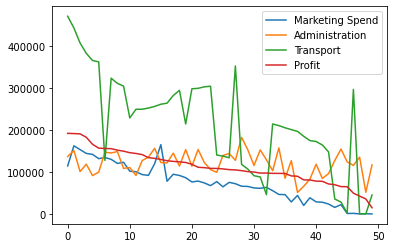

In [12]:
import matplotlib.pyplot as plt

df.plot()

## Encoding

In [13]:
# Without use AnyEncoding
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [14]:
df.Area=df.Area.replace(['Dhaka', 'Ctg', 'Rangpur'],[3,2,1])
df.Area.head(10)

0    3
1    2
2    1
3    3
4    1
5    3
6    2
7    1
8    3
9    2
Name: Area, dtype: int64

In [15]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,3,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,3,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### Lavel Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,3,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,3,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,3,156991.12
6,134615.46,147198.87,127716.82,2,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,3,152211.77
9,123334.88,108679.17,304981.62,2,149759.96


In [18]:
lavel=LabelEncoder() # Object Create

In [19]:
df.Area=lavel.fit_transform(df["Area"])

In [20]:
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,0,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,0,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,0,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [21]:
# if multiple catagorical column then loop using

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=LabelEncoder().fit_transform(df[col])

df.head(10)

<ipython-input-21-6c1ab5c31339>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype==np.number:


,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,0,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,0,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,0,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


### One-Hot Encoding

In [22]:
#load dataset
df=pd.read_csv("Feature Engineering in ML  Handle NaN Values, All About Encoding & Variables DataSet/online.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [23]:
pd.get_dummies(df["Area"])
# dummies_variable=pd.get_dummies(df["Area"])

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
6,1,0,0
7,0,0,1
8,0,1,0
9,1,0,0


In [24]:
dummies_variable=pd.get_dummies(df["Area"],drop_first=True)

In [25]:
dummies_variable

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,0
7,0,1
8,1,0
9,0,0


In [26]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [27]:
#Delate Area
new_df=df.drop('Area',axis=1)
new_df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [28]:
df=pd.concat([new_df,dummies_variable],axis=1)
df.head()

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


### Ordinal Encoding

In [29]:
#load dataset
df=pd.read_csv("Feature Engineering in ML  Handle NaN Values, All About Encoding & Variables DataSet/online.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [32]:
city_list=['Dhaka', 'Ctg', 'Rangpur']

In [33]:
ordinal=OrdinalEncoder(categories=[city_list])

In [34]:
oridinal_value=ordinal.fit_transform(df[["Area"]]) #number of semple and number of feature 
oridinal_value

array([[0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.]])

In [35]:
new_area=pd.DataFrame(oridinal_value,columns=["Area"])
new_area

,Area
0,0.0
1,1.0
2,2.0
3,0.0
4,2.0
5,0.0
6,1.0
7,2.0
8,0.0
9,1.0


In [36]:
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [37]:
#replace old area to new Area
df.Area=new_area

In [38]:
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,191792.06
2,153441.51,101145.55,407934.54,2.0,191050.39
3,144372.41,118671.85,383199.62,0.0,182901.99
4,142107.34,91391.77,366168.42,2.0,166187.94
5,131876.90,99814.71,362861.36,0.0,156991.12
6,134615.46,147198.87,127716.82,1.0,156122.51
7,130298.13,145530.06,323876.68,2.0,155752.60
8,120542.52,148718.95,311613.29,0.0,152211.77
9,123334.88,108679.17,304981.62,1.0,149759.96


### Or

In [39]:
#Delate Area
new_df=df.drop('Area',axis=1)
new_df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [40]:
df=pd.concat([new_df,new_area],axis=1)
df.head()

,Marketing Spend,Administration,Transport,Profit,Area
0,114523.61,136897.80,471784.10,192261.83,0.0
1,162597.70,151377.59,443898.53,191792.06,1.0
2,153441.51,101145.55,407934.54,191050.39,2.0
3,144372.41,118671.85,383199.62,182901.99,0.0
4,142107.34,91391.77,366168.42,166187.94,2.0


### Hashing Encoding

In [41]:
#load dataset
df=pd.read_csv("Feature Engineering in ML  Handle NaN Values, All About Encoding & Variables DataSet/online.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [42]:
import category_encoders as ce

In [43]:
#encoder=ce.HashingEncoder(cols="Area")
encoder=ce.HashingEncoder(cols="Area",n_components=3)

In [44]:
encoder.fit_transform(df)

,col_0,col_1,col_2,Marketing Spend,Administration,Transport,Profit
0,0,1,0,114523.61,136897.80,471784.10,192261.83
1,0,0,1,162597.70,151377.59,443898.53,191792.06
2,1,0,0,153441.51,101145.55,407934.54,191050.39
3,0,1,0,144372.41,118671.85,383199.62,182901.99
4,1,0,0,142107.34,91391.77,366168.42,166187.94
5,0,1,0,131876.90,99814.71,362861.36,156991.12
6,0,0,1,134615.46,147198.87,127716.82,156122.51
7,1,0,0,130298.13,145530.06,323876.68,155752.60
8,0,1,0,120542.52,148718.95,311613.29,152211.77
9,0,0,1,123334.88,108679.17,304981.62,149759.96
